# FAIRe Qualitäts-KPIs
Autor: Paul Zuendel  
Datum: 24.10.2023

## Forschungsfrage
Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

Bekommt man bei längerem Fahrgestell einfach und schnell ein preiswerteres Auto, also mehr AUto für sein Geld.

## Erstes Fahrzeug


### Versuchsziel
Formulieren Sie ein Versuchsziel für diesen ersten Versuch:

Eine Preisgrundlage mit einem sehr kurzen 2-Achser schaffen und so die Mindeskosten für ein Auto abschätzen.

### Versuchsaufbau

Bauen Sie ein erstes Fahrzeug aus den gegebenen LEGO-Teilen in der CAD-Software LeoCAD auf.

Hierbei gelten die folgenden Rahmenbedingungen:
- Das Fahrzeug muss aus Baugruppen, Bauteilen und Komponenten bestehen.
- Es muss mindestens vier Räder besitzen
- Es muss sich durch den elektrischen Antrieb fortbewegen können. 
- Die Verwendung eines Getriebes zwischen Motor und Antriebsachse(n) ist verpflichtend. 
- Die Farbe von mindestens einem Teil soll sich von der in LeoCAD hinterlegten Standardfarbe unterscheiden.
- Es sind nur die LEGO-Teile zu verwenden, welche sich in den JSON-Dateien bzw. in
der zur Verfügung gestellten Teilebibliothek befinden.

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu (*Hinweise: Ein Bild lässt sich mit \!\[Bildbeschreibung](/Pfad/zum/Bild) hinzufügen. Achten Sie darauf, das Bild später auch in Git hinzuzufügen*):


![Auto 1](Auto1.png)

Beschreiben Sie kurz und präzise Ihr Fahrzeug:

Kompakter 2-Achser mit Heckantrieb durch mittleren Motor und offenem Fahrgestell.

Bauen Sie das Fahrzeug nun in unserem Software-Framework zusammen. Instanziieren Sie die LEGO-Teile und lesen Sie dabei auch die Eigenschaften ein. Ergänzen Sie zusätzliche Eigenschaften, wie z.B. die Farbe. Referenzieren Sie die Teile aufeinander und erstellen Sie auf diese Weise sinnvolle Bauteile, Baugruppen und das
Gesamtsystem. Nutzen Sie die hierfür bereitgestellten Klassendefinitionen und Methoden. Achten Sie auf eine gute Code-Dokumentation. Sie können sich für die Bearbeitung an den zur Verfügung gestellten Code-Zellen orientieren, können hiervon jedoch auch abweichen.

*Hinweise: Achten Sie auf die Unterschiede zum Minimalbeispiel. Eine direkte Kopie ist nicht möglich. Achten Sie außerdem darauf, ein Teil (eindeutig identifiziert durch seine UUID) nicht an mehreren Stellen zu verbauen*

In [13]:
import json
import pprint
from functions import calculation_rules
from functions.classes import LegoComponent
from functions.classes import LegoAssembly
from functions.classes import AggregationLayer
from functions.classes import KPIEncoder
from functions.classes import print_assembly_tree

In [14]:
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)

print(axles["50451"])

front_axle = LegoComponent("front axle", axles["50451"])

print(front_axle.properties["label"])
front_axle.properties["color"] = "black"


back_axle = LegoComponent()
back_axle.properties["label"] = "back axle"
back_axle.properties.update(axles["50451"])

back_axle.properties["color"] = "black"

pprint.pprint(back_axle.properties)

# Now wheels
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)


front_wheel = LegoComponent("front wheels", wheels["56904c02"], surface="rough", paint="black")
    
front_wheel_2 = front_wheel.clone("front wheels")
pprint.pprint(front_wheel.properties)

back_wheel = front_wheel.clone("back wheels")
back_wheel_2 = front_wheel.clone("back wheels")

#Motor
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)
motor = LegoComponent("motor", motors["8883-1"], paint="black")

#Getriebe
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
zahnrad = LegoComponent("gear", gears["32269"], paint="black")    
zahnrad_2 = zahnrad.clone("gear")
stange = LegoComponent("axle", axles["44294"], paint="black")

#Batterie
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
batterie = LegoComponent("batterie", batteries["8881-1"], paint="black") 

#Karosserie
with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)
car_frame = LegoComponent("car frame", frame["39790"], {"color": "black"})
pprint.pprint(car_frame.properties)
#Befestigung
pin_1 = LegoComponent("pins", frame["32054"], {"color": "black"})
pin_2 = pin_1.clone("pins")
pin_3 = pin_1.clone("pins")
pin_4 = pin_1.clone("pins")

{'item number': 50451, 'item description': 'Axle 16 studs', 'category': 'axle', 'price [Euro]': 0.75, 'mass [g]': 2.37, 'delivery time [days]': 3, 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=50451#T=S&O={%22iconly%22:0}', 'dimension [studs]': 16}
front axle
{'category': 'axle',
 'color': 'black',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=50451#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 3,
 'dimension [studs]': 16,
 'item description': 'Axle 16 studs',
 'item number': 50451,
 'label': 'back axle',
 'mass [g]': 2.37,
 'price [Euro]': 0.75}
{'category': 'wheel',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=56904c02#T=C',
 'delivery time [days]': 5,
 'diameter [mm]': 43.2,
 'item description': 'wheel 43,2',
 'item number': '56904c02',
 'label': 'front wheels',
 'mass [g]': 13.0,
 'paint': 'black',
 'price [Euro]': 0.11,
 'related items': 30699,
 'surface': 'rough'}
{'category': 'frame',
 'color': 

In [15]:
# aggregate components

front_wheel_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "front wheel assembly"
    )
front_wheel_assembly.add([front_wheel, front_wheel_2, front_axle])


# Stick together back wheel parts
back_wheel_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "back wheel assembly"
    )
back_wheel_assembly.add([back_wheel, back_wheel_2, back_axle])


#Antrieb
drive_assembly =  LegoAssembly(AggregationLayer.SUBASSEMBLY, "drive assembly")
drive_assembly.add([zahnrad, zahnrad_2, motor, stange])
 
#Platform
chassis_assembly =  LegoAssembly(AggregationLayer.SUBASSEMBLY, "chassis assembly")
drive_assembly.add([batterie, pin_1, pin_2, pin_3, pin_4, car_frame ])

car = LegoAssembly(AggregationLayer.SYSTEM,"car")

car.add([drive_assembly, front_wheel_assembly, back_wheel_assembly, chassis_assembly])

print(car.get_component_list(max_depth=0))


[]


### Analyse
Bestimmen Sie die Qualität Ihres Fahrzeugs mittels KPIs.
Die Qualität des Fahrzeugs ist mit mindestens einem KPI je Qualitätsdimension (Aufwand, Verfügbarkeit, Akzeptanz) zu bestimmen. Enwickeln Sie zunächst sinnvolle KPIs, welche mit den gegebenen Daten umsetzbar sind. Halten Sie die Berechnungsvorschriften im Jupyter Notebook fest. Implementieren Sie deren Berechnung für das Gesamtsystem "Fahrzeug" mittels einzelner Funktionen im Skript `calculation_rules`. Sie können zusätzlich Ihre Methoden auch auf die niedrigeren Aggregationsebenen anwenden.

Beschreiben Sie den jeweiligen KPI und geben Sie seine Berechnungsvorschrift an:

$$
a = \frac{b}{c} + d
$$

Gesamtmasse bestimmen: Alle MAssen der Teile aufaddieren.
Lieferdauer: Teil bestimmen, welches die höchste Lieferzeit hat und diese angeben.
Gesamtpreis: Alle Einzelpreise aufaddieren.

Halten Sie die berechneten Werte für die KPIs im Notebook
fest:

In [16]:
#Masse
total_mass = calculation_rules.kpi_mass(car)
car.properties["mass [g]"] = total_mass
mass_1 = total_mass

#KPI Delivery Time
total_delivery = calculation_rules.kpi_time(car)
car.properties["delivery time [days]"] = total_delivery
time_1 = total_delivery

#Total Price
total_price = calculation_rules.kpi_price(car)
car.properties["price [Euro]"] = total_price
price_1 = total_price

In [17]:
# print your KPIs

print("Gesamtmasse: ", mass_1, "g")
print("Lieferzeit: ",time_1, "Tage")
print("Preis: ",price_1, "Euro")


Gesamtmasse:  289.2700000000001 g
Lieferzeit:  13 Tage
Preis:  36.89999999999999 Euro


Exportieren Sie schließlich Ihr entworfenes Fahrzeug inklusive der entwickelten KPIs:

In [18]:
# export car and its properties
with open("car.json", "w") as fp:
    json.dump(car.to_dict(), fp, cls=KPIEncoder, indent=4)
    
pprint.pprint(car.to_dict())

{'assembly': {'assemblies': [{'assembly': {'assemblies': [],
                                           'components': [{'component': {'layer': <AggregationLayer.COMPONENT: 4>,
                                                                         'properties': {'category': 'gear',
                                                                                        'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=32269#T=C',
                                                                                        'delivery time [days]': 13,
                                                                                        'item description': 'Gear '
                                                                                                            '20 '
                                                                                                            'Tooth',
                                                                                 

## Zweites Fahrzeug

### Versuchsziel

Setzen Sie sich ein Ziel, welche Qualitätsdimensionen in einem zweiten Fahrzeug verbessert werden sollen und bauen
Sie darauf aufbauend ein zweites Fahrzeug aus den gegebenen LEGO-Teilen auf.
Die Anforderungen an das Fahrzeug sind identisch zum ersten. Wählen Sie die Einzelteile und deren Zusammenspiel entsprechend Ihrer Zielstellung aus.

Formulieren Sie ein Versuchsziel für diesen Versuch. Beschreiben Sie unter anderem, welche Verbesserung Sie vornehmen möchten:

Ziel ist es ein längeres und preiswerteres Fahrzeug zu erhalten, also einen geringeren Preis pro Kilo zu erzeugen, ohne Einbuße bei dem Antrieb zu haben.

### Versuchsaufbau

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu:

![Auto 2](Auto2.png)

Beschreiben Sie kurz und präzise den Aufbau des zweiten Fahrzeugs:

Ein 3-Achser mit zwei dopelt so langem Fahrgestell im Vergleich zum 2-Achser. Heckantrieb mit mittlerem Motor bleibt bestehen.

Erstellen Sie das Fahrzeug in unserem Softwareframework:

In [19]:
# initialize components
 #Achsen
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)

print(axles["50451"])

front_axle = LegoComponent("front axle", axles["50451"])

print(front_axle.properties["label"])
front_axle.properties["color"] = "black"

mid_axle = front_axle.clone("mid axle")

back_axle = front_axle.clone("back axle")

back_axle.properties["color"] = "black"

pprint.pprint(back_axle.properties)

# Now wheels
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)


front_wheel = LegoComponent("front wheels", wheels["56904c02"], surface="rough", paint="black")
    
front_wheel_2 = front_wheel.clone("front wheels")
pprint.pprint(front_wheel.properties)

mid_wheel = front_wheel.clone("mid wheels")
mid_wheel_2 = front_wheel.clone("mid wheels")

back_wheel = front_wheel.clone("back wheels")
back_wheel_2 = front_wheel.clone("back wheels")

#Motor
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)
motor = LegoComponent("motor", motors["8883-1"], paint="black")

#Getriebe
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
zahnrad = LegoComponent("gear", gears["32269"], paint="black")    
zahnrad_2 = zahnrad.clone("gear")
stange = LegoComponent("axle", axles["44294"], paint="black")

#Batterie
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
batterie = LegoComponent("batterie", batteries["8881-1"], paint="black") 

#Karosserie
with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)
car_frame = LegoComponent("car frame", frame["39790"], {"color": "black"})
car_frame_2 = car_frame.clone("car frame")

pprint.pprint(car_frame.properties)

#Befestigung
pin_1 = LegoComponent("pins", frame["32054"], {"color": "black"})
pin_2 = pin_1.clone("pins")
pin_3 = pin_1.clone("pins")
pin_4 = pin_1.clone("pins")
pin_5 = pin_1.clone("pins")
pin_6 = pin_1.clone("pins")

{'item number': 50451, 'item description': 'Axle 16 studs', 'category': 'axle', 'price [Euro]': 0.75, 'mass [g]': 2.37, 'delivery time [days]': 3, 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=50451#T=S&O={%22iconly%22:0}', 'dimension [studs]': 16}
front axle
{'category': 'axle',
 'color': 'black',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=50451#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 3,
 'dimension [studs]': 16,
 'item description': 'Axle 16 studs',
 'item number': 50451,
 'label': 'back axle',
 'mass [g]': 2.37,
 'price [Euro]': 0.75}
{'category': 'wheel',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=56904c02#T=C',
 'delivery time [days]': 5,
 'diameter [mm]': 43.2,
 'item description': 'wheel 43,2',
 'item number': '56904c02',
 'label': 'front wheels',
 'mass [g]': 13.0,
 'paint': 'black',
 'price [Euro]': 0.11,
 'related items': 30699,
 'surface': 'rough'}
{'category': 'frame',
 'color': 

In [20]:
# aggregate components

#wheels
front_wheel_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "front wheel assembly"
    )
front_wheel_assembly.add([front_wheel, front_wheel_2, front_axle])

mid_wheel_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "mid wheel assembly"
    )
mid_wheel_assembly.add([mid_wheel, mid_wheel_2, mid_axle])

back_wheel_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "back wheel assembly"
    )
back_wheel_assembly.add([back_wheel, back_wheel_2, back_axle])


#Antrieb
drive_assembly =  LegoAssembly(AggregationLayer.SUBASSEMBLY, "drive assembly")
drive_assembly.add([zahnrad, zahnrad_2, motor, stange])
 
#Platform
chassis_assembly =  LegoAssembly(AggregationLayer.SUBASSEMBLY, "chassis assembly")
drive_assembly.add([batterie, pin_1, pin_2, pin_3, pin_4, pin_5, pin_6, car_frame, car_frame_2 ])

#Auto
car_2 = LegoAssembly(AggregationLayer.SYSTEM,"car")

car_2.add([drive_assembly, front_wheel_assembly, back_wheel_assembly,mid_wheel_assembly, chassis_assembly])

print(car_2.get_component_list(max_depth=0))

[]


### Analyse
Bestimmen Sie die KPIs des zweiten Fahrzeugs

In [21]:
# calculate the KPIs for your car
#Masse
total_mass = calculation_rules.kpi_mass(car_2)
car_2.properties["mass [g]"] = total_mass
mass_2 = total_mass

#KPI Delivery Time
total_delivery = calculation_rules.kpi_time(car_2)
car_2.properties["delivery time [days]"] = total_delivery
time_2 = total_delivery

#Total Price
total_price = calculation_rules.kpi_price(car_2)
car_2.properties["price [Euro]"] = total_price
price_2 = total_price

In [25]:
# print your KPIs
print("Gesamtmasse: ", mass_2, "g")
print("Lieferzeit: ",time_2, "Tage")
print("Preis: ",price_2, "Euro")

Gesamtmasse:  331.2600000000001 g
Lieferzeit:  13 Tage
Preis:  40.079999999999984 Euro


Exportieren Sie Ihr Fahrzeug inklusive der KPIs:

In [23]:
# export car and its properties
with open("car_2.json", "w") as fp:
    json.dump(car_2.to_dict(), fp, cls=KPIEncoder, indent=4)
    
pprint.pprint(car_2.to_dict())

{'assembly': {'assemblies': [{'assembly': {'assemblies': [],
                                           'components': [{'component': {'layer': <AggregationLayer.COMPONENT: 4>,
                                                                         'properties': {'category': 'gear',
                                                                                        'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=32269#T=C',
                                                                                        'delivery time [days]': 13,
                                                                                        'item description': 'Gear '
                                                                                                            '20 '
                                                                                                            'Tooth',
                                                                                 

## Diskussion
### Ergebnisse
Stellen Sie die entwickelten KPIs beider Fahrzeuge gegenüber und wählen Sie hierfür unter anderem eine geeignete
grafische Darstellung. Stellen Sie dabei insbesondere sicher, dass die Datengrundlage ersichtlich ist. Halten Sie
auch die Plotbefehle im Notebook fest:

<Figure size 864x288 with 0 Axes>

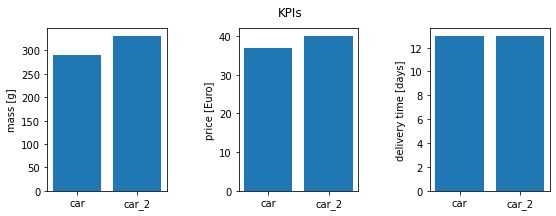

In [24]:
# plot the data, save diagramm as svg-file
import matplotlib.pyplot as plt
import numpy as np

cars = ['car','car_2']

plt.figure(figsize=(12, 4))

#plot mass
mass = [mass_1, mass_2]
values = [1, 10, 100]
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar(cars, mass)
plt.ylabel('mass [g]')
plt.subplots_adjust(wspace=0.6)

#plot price
price = [price_1, price_2]
plt.subplot(132)
plt.bar(cars, price)
plt.ylabel('price [Euro]')

#plot delivery time
time = [time_1, time_2]
plt.subplot(133)
plt.bar(cars, time)
plt.ylabel('delivery time [days]')

plt.suptitle('KPIs')

plt.savefig('plot_kpi.svg', format = 'svg')

plt.show()

Interpretieren Sie Ihre Ergebnisse. Vergleichen Sie die KPIs Ihrer Autos. Konnten Sie Ihre gewünschte Verbesserung erzielen? Welche Schlüsse ziehen Sie aus den Ergebnissen für die Qualität der beiden
Fahrzeuge?

Der Preis pro Kilo sinkt bei mehr Standartbauteilen. Auch bei längerem Fahrzeug bleibt die Lieferzeit unverändert, was das ganze Attraktiver macht, da man bei gleicher Dauer deutlich mehr Teile bekommen kann.

Diskutieren Sie, inwieweit Ihre entwickelten KPIs die im Skript erläuterten FAIR-Prinzipien erfüllen:

Alle Daten sind auffindbar, klar definiert und registriert. Auch sind sie bei Verwendung der genutzten frei zugänglichen Anwendungen accessible. Die benutzte Sprache ist keine Standard Wissenschaftsprache, für die Uni-Zwecke aber von jedem nutzbar und wiedervendbar sind.

## Fazit

Ziehen Sie ein persönliches Fazit. Was haben Sie Neues gelernt?

Den Umgang mit dem JupiterNotebook und ein Grundverständnis für KPIs.